In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import *
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
data = pd.read_csv('./Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
print(np.unique(data['Species']))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [26]:
binom_data = data[data['Species'] != 'Iris-virginica']
print(np.unique(binom_data['Species']))

['Iris-setosa' 'Iris-versicolor']


In [27]:
binom_x = binom_data.drop(columns='Species', axis=1)
binom_y = binom_data['Species']
binom_y = binom_y.map({
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1
})

In [28]:
binom_y = binom_y.values.reshape(-1)

In [29]:
bX_train, bX_test, bY_train, bY_test = train_test_split(binom_x, binom_y, test_size=0.3, random_state=1)

In [30]:
bnb = GaussianNB()
bnb.fit(bX_train,bY_train)

GaussianNB()

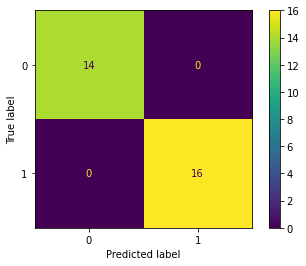

In [31]:
b_predictions = bnb.predict(bX_test)
ConfusionMatrixDisplay.from_predictions(bY_test,b_predictions)

In [32]:
roc_auc_score(bY_test,b_predictions)

1.0

In [33]:
print(classification_report(bY_test,b_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
matthews_corrcoef(bY_test, b_predictions)

1.0

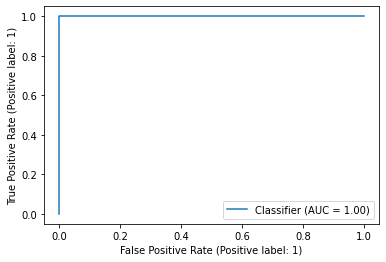

In [35]:
RocCurveDisplay.from_predictions(bY_test, b_predictions)

#### PPV = (TP / Values predicted as True)
#### NPV = (TN / Values predicted as False)
#### Sensitivity or Recall or True Positive Rate= (TP / Positive Values)
#### Specificity  or True Negative Rate  = (TN / Negative Values)
#### F1-score = 2 × (precision × recall)/(precision + recall)

In [36]:
X = data.drop(columns = 'Species', axis=1)
Y = data['Species']
Y = Y.map({
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
})
Y = Y.values.reshape(-1)
nb = GaussianNB()

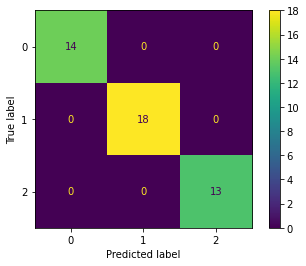

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
nb.fit(X_train,Y_train)
predictions = nb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test,predictions)

In [38]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### To check if the given dataset is balanced

In [39]:
print(np.unique(data['Species'], return_counts=True))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([50, 50, 50]))


1.0


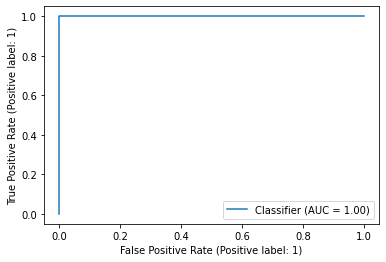

In [40]:
Setosa_X = data.drop(columns = 'Species', axis=1)
Setosa_Y = data['Species']
Setosa_Y = Setosa_Y.map({
    'Iris-setosa':1,
    'Iris-versicolor':0,
    'Iris-virginica':0
})
Setosa_Y = Setosa_Y.values.reshape(-1)
snb = GaussianNB()
SXTrain, SXTest, SYTrain, SYTest = train_test_split(Setosa_X,Setosa_Y,test_size=0.3,random_state=1)
snb.fit(SXTrain,SYTrain)
SPredictions = snb.predict(SXTest)
print(roc_auc_score(SYTest, SPredictions))
RocCurveDisplay.from_predictions(SYTest, SPredictions)

In [41]:
pred_prob = nb.predict_proba(X_test)
print(roc_auc_score(Y_test,pred_prob,multi_class='ovo'))

1.0


0.9722222222222222


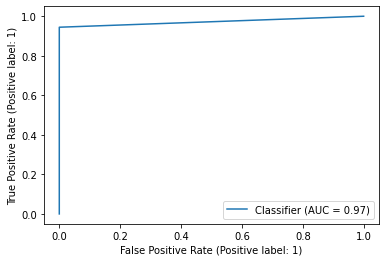

In [42]:

Setosa_X = data.drop(columns = 'Species', axis=1)
Setosa_Y = data['Species']
Setosa_Y = Setosa_Y.map({
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':0
})
Setosa_Y = Setosa_Y.values.reshape(-1)
snb = GaussianNB()
SXTrain, SXTest, SYTrain, SYTest = train_test_split(Setosa_X,Setosa_Y,test_size=0.3,random_state=1)
snb.fit(SXTrain,SYTrain)
SPredictions = snb.predict(SXTest)
print(roc_auc_score(SYTest, SPredictions))
RocCurveDisplay.from_predictions(SYTest, SPredictions)

0.984375


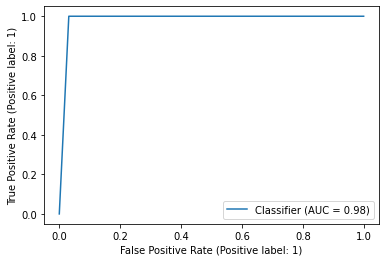

In [43]:

Setosa_X = data.drop(columns = 'Species', axis=1)
Setosa_Y = data['Species']
Setosa_Y = Setosa_Y.map({
    'Iris-setosa':0,
    'Iris-versicolor':0,
    'Iris-virginica':1
})
Setosa_Y = Setosa_Y.values.reshape(-1)
snb = GaussianNB()
SXTrain, SXTest, SYTrain, SYTest = train_test_split(Setosa_X,Setosa_Y,test_size=0.3,random_state=1)
snb.fit(SXTrain,SYTrain)
SPredictions = snb.predict(SXTest)
print(roc_auc_score(SYTest, SPredictions))
RocCurveDisplay.from_predictions(SYTest, SPredictions)